Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from tqdm.notebook import tqdm

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [2]:
NUM_ITEMS = 100
DIMENSIONS = 20

WEIGHTS = np.random.randint(1, 50+1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS*20)
VALUES = np.random.randint(1, 100+1, size=NUM_ITEMS)

In [3]:
def value(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1

In [4]:
solution = np.full(NUM_ITEMS, False)

history = [value(solution)]
for n in tqdm(range(1, 200+1)):
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]
    history.append(value(new_solution))
    if value(new_solution) > value(solution):
        logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
        solution = new_solution

  0%|          | 0/200 [00:00<?, ?it/s]

[14:15:26] INFO: Whoa! After 1 found value=79
[14:15:26] INFO: Whoa! After 2 found value=132
[14:15:26] INFO: Whoa! After 3 found value=219
[14:15:26] INFO: Whoa! After 4 found value=260
[14:15:26] INFO: Whoa! After 5 found value=283
[14:15:26] INFO: Whoa! After 6 found value=300
[14:15:26] INFO: Whoa! After 7 found value=392
[14:15:26] INFO: Whoa! After 8 found value=479
[14:15:26] INFO: Whoa! After 9 found value=530
[14:15:26] INFO: Whoa! After 10 found value=540
[14:15:26] INFO: Whoa! After 11 found value=563
[14:15:26] INFO: Whoa! After 12 found value=634
[14:15:26] INFO: Whoa! After 13 found value=687
[14:15:26] INFO: Whoa! After 15 found value=705
[14:15:26] INFO: Whoa! After 16 found value=736
[14:15:26] INFO: Whoa! After 17 found value=783
[14:15:26] INFO: Whoa! After 18 found value=824
[14:15:26] INFO: Whoa! After 19 found value=890
[14:15:26] INFO: Whoa! After 20 found value=963
[14:15:26] INFO: Whoa! After 22 found value=1,019
[14:15:26] INFO: Whoa! After 23 found value=1,04

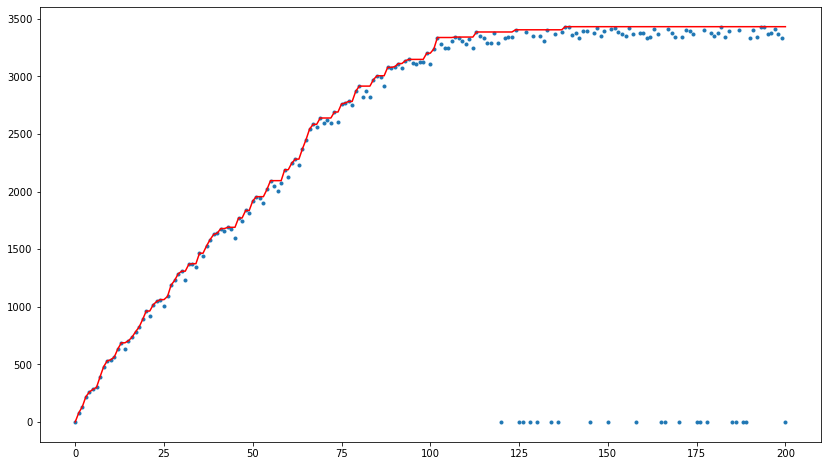

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')